# Маркетинговая аналитика: сервис Яндекс.Афиша.

**Имеются:**  данные Яндекс.Афиши с июня 2017 по конец мая 2018 года. 
Среди них: 
- лог сервера с данными о посещениях сайта Яндекс.Афиши
- выгрузка всех заказов за этот период
- статистика рекламных расходов

**Необходимо:** перераспределить бюджет, снизить малоэффективные маркетинговые расходы. Для этго изучим:
- как клиенты пользуются сервисом
- когда делают первые покупки на сайте
- сколько денег приносит компании каждый клиент
- когда расходы на привлечение клиента окупаются

# Содержание проекта:

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу." data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу.</a></span></li><li><span><a href="#Рассчитаем-метрики-и-построим-графики." data-toc-modified-id="Рассчитаем-метрики-и-построим-графики.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Рассчитаем метрики и построим графики.</a></span><ul class="toc-item"><li><span><a href="#Продуктовые-метрики" data-toc-modified-id="Продуктовые-метрики-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Продуктовые метрики</a></span><ul class="toc-item"><li><span><a href="#DAU,-WAU-и-MAU" data-toc-modified-id="DAU,-WAU-и-MAU-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>DAU, WAU и MAU</a></span></li><li><span><a href="#Сколько-раз-за-день-пользователи-в-среднем-заходят-на-сайт." data-toc-modified-id="Сколько-раз-за-день-пользователи-в-среднем-заходят-на-сайт.-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Сколько раз за день пользователи в среднем заходят на сайт.</a></span></li><li><span><a href="#Сколько-времени-пользователи-проводят-на-сайте." data-toc-modified-id="Сколько-времени-пользователи-проводят-на-сайте.-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Сколько времени пользователи проводят на сайте.</a></span></li><li><span><a href="#Retention-Rate." data-toc-modified-id="Retention-Rate.-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Retention Rate.</a></span></li></ul></li><li><span><a href="#Метрики-электронной-коммерции" data-toc-modified-id="Метрики-электронной-коммерции-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Метрики электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Сколько-времени-в-среднем-проходит-с-момента-первого-посещения-сайта-до-совершения-покупки" data-toc-modified-id="Сколько-времени-в-среднем-проходит-с-момента-первого-посещения-сайта-до-совершения-покупки-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки</a></span></li><li><span><a href="#Среднее-количество-покупок-на-одного-покупателя-за-определённый-период" data-toc-modified-id="Среднее-количество-покупок-на-одного-покупателя-за-определённый-период-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Среднее количество покупок на одного покупателя за определённый период</a></span></li><li><span><a href="#Средний-чек-(Average-Order-Value)" data-toc-modified-id="Средний-чек-(Average-Order-Value)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Средний чек (Average Order Value)</a></span></li><li><span><a href="#LTV." data-toc-modified-id="LTV.-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>LTV.</a></span></li></ul></li><li><span><a href="#Маркетинговые-метрики" data-toc-modified-id="Маркетинговые-метрики-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Маркетинговые метрики</a></span><ul class="toc-item"><li><span><a href="#Расходы-на-маркетинг." data-toc-modified-id="Расходы-на-маркетинг.-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Расходы на маркетинг.</a></span></li><li><span><a href="#CAC" data-toc-modified-id="CAC-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>CAC</a></span></li><li><span><a href="#ROMI" data-toc-modified-id="ROMI-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>ROMI</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-и-рекомендации." data-toc-modified-id="Выводы-и-рекомендации.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы и рекомендации.</a></span></li></ul></div>

## Загрузка данных и подготовка их к анализу.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import scipy as sp

In [82]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [83]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [84]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Названия колонок преобразуем, в столбцах со временем поменяем формат.

In [85]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [86]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [87]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Аналогично с *orders* и *costs*.

In [88]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [89]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [90]:
costs.source_id.value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

Обратим внимание, что в этом датафрейме представлены не все источники трафика.

In [91]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [92]:
costs['dt'] = pd.to_datetime(costs['dt'])

## Рассчитаем метрики и построим графики.

### Продуктовые метрики

####  DAU, WAU и MAU

In [93]:
visits['ts_year']  = visits['start_ts'].dt.year
visits['ts_month'] = visits['start_ts'].dt.month
visits['ts_week']  = visits['start_ts'].dt.week
visits['ts_date'] = visits['start_ts'].dt.date

In [94]:
visits.head(1) # Проверка

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20


In [95]:
dau = visits.groupby('ts_date').agg({'uid': 'nunique'})
mau = visits.groupby('ts_month').agg({'uid': 'nunique'})
wau  = visits.groupby(['ts_year', 'ts_week']).agg({'uid': 'nunique'})
print('Среднее количество уникальных пользователей в день: ', round(dau.uid.mean()))
print('Среднее количество уникальных пользователей в неделю: ', round(wau.uid.mean()))
print('Среднее количество уникальных пользователей в месяц: ', round(mau.uid.mean()))

Среднее количество уникальных пользователей в день:  908
Среднее количество уникальных пользователей в неделю:  5716
Среднее количество уникальных пользователей в месяц:  23228


In [96]:
dau = visits.pivot_table(index='ts_date', values='uid', aggfunc='nunique')
dau.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 2017-06-01 to 2018-05-31
Data columns (total 2 columns):
ts_date    364 non-null int64
uid        364 non-null int64
dtypes: int64(2)
memory usage: 8.5+ KB


In [180]:
dau.head()

,ts_date,uid
ts_date,,
2017-06-01,1,605
2017-06-02,1,608
2017-06-03,1,445
2017-06-04,1,476
2017-06-05,1,820


Изменения по времени: 

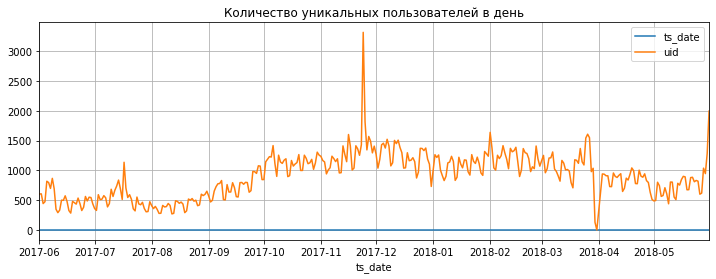

In [98]:
dau.plot(grid=True, figsize=(12, 4), title='Количество уникальных пользователей в день');

3 выброса бросаются в глаза: в ноябре 2017, в конце марта 2018, и в самые последние дни.

Так же график похож на ритм сердцебиения: с постоянными взлетами и падениями. Предположу, что в выходные количество "уников" падает, а в будни растет - как раз получается примерно по 4 "такта" в месяц.

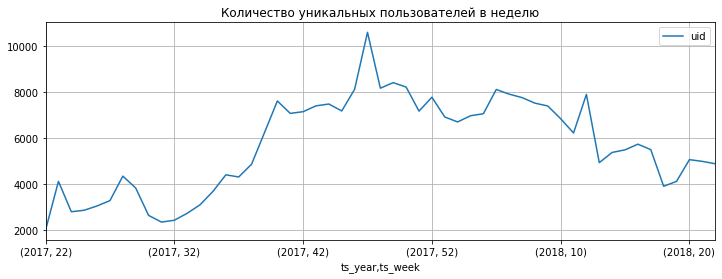

In [99]:
wau.plot(grid=True, figsize=(12, 4), title='Количество уникальных пользователей в неделю');

Выбросы примерно сопвпадают за исключением последней недели.

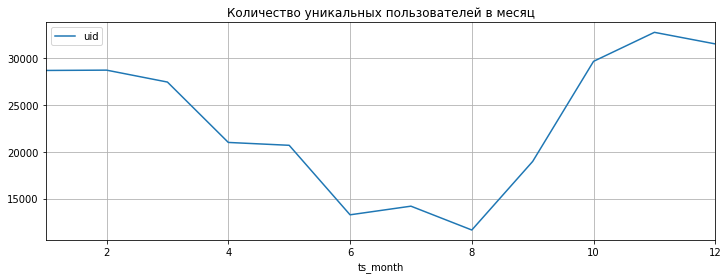

In [100]:
mau.plot(grid=True, figsize=(12, 4), title='Количество уникальных пользователей в месяц');

Картина, казалось бы, прямо противоположная. А все потому, что на **mau**-графике месяцы изображены в календарном порядке - с января по декабрь, а на **dau**-графике - с июня по июнь.

#### Сколько раз за день пользователи в среднем заходят на сайт.

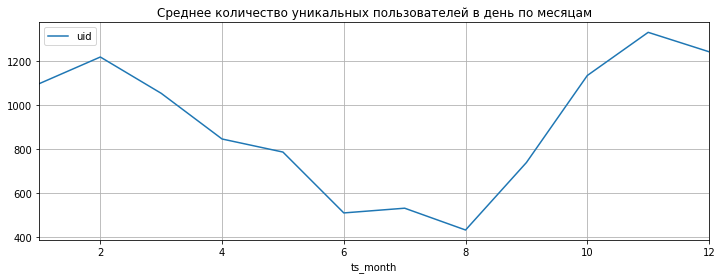

In [101]:
visits.groupby(['ts_month','ts_date']).agg({'uid': 'nunique'}).groupby('ts_month').agg({'uid': 'mean'}).plot(grid=True, figsize=(12, 4), title='Среднее количество уникальных пользователей в день по месяцам');

Неудивительно, но факт: летом спрос на услуги Яндекс.Афиши заметно реже, чем в остальной период.

Пиковые значения посещений колеблятся в районе 1200-1300, самые редкие - в районе 500. 
Среднее значение уникальных пользователей в день:  908.

Отобразим среднее количество сессий в сутки.

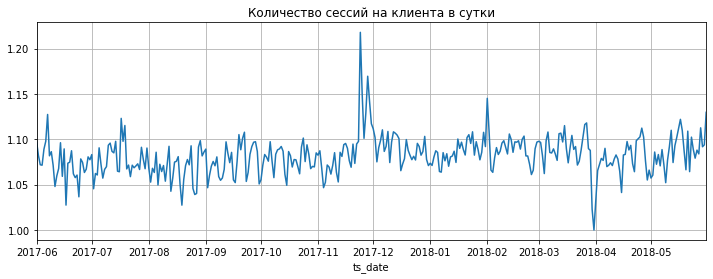

In [102]:
sess_per_user = visits.groupby('ts_date').agg({'uid': ['count', 'nunique']})
sess_per_user.columns = ['n_sessions', 'n_users']
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']
sess_per_user['sess_per_user'].plot(figsize=(12,4), grid=True).set_title('Количество сессий на клиента в сутки');

In [103]:
print('Сколько раз за день пользователи в среднем заходят на сайт: ', round(sess_per_user['sess_per_user'].mean(), 3), 'человека в сутки')


Сколько раз за день пользователи в среднем заходят на сайт:  1.082 человека в сутки


#### Сколько времени пользователи проводят на сайте.

In [104]:
visits['ts_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head() # Посчитаем и выведем результат в секундах

,device,end_ts,source_id,start_ts,uid,ts_year,ts_month,ts_week,ts_date,ts_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [105]:
print('Средняя продолжительность пользовательской сессии составляет ', round(visits['ts_duration'].mean()/60, 2), 'минут.') 

Средняя продолжительность пользовательской сессии составляет  10.73 минут.


Вычислим значение метрики ASL в качестве моды:

In [106]:
visits['ts_duration'].mode()

0    60
dtype: int64

Вычислим значение метрики ASL в качестве медианы:

In [107]:
visits['ts_duration'].median()

300.0

60 секунд - самая распространенная продолжительность сессии. 300 - медианная продолжительность.

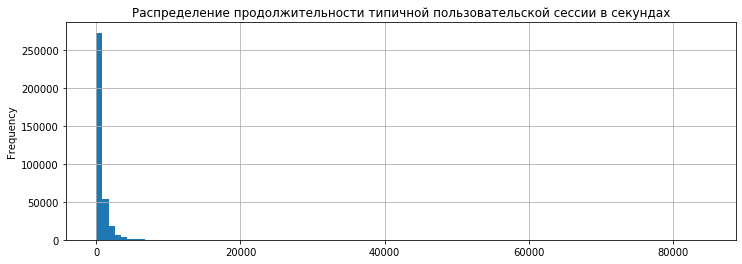

In [108]:
visits['ts_duration'].plot(kind='hist', bins=100, grid=True, figsize=(12, 4), title='Распределение продолжительности типичной пользовательской сессии в секундах');

Чья то сессия составила целые сутки! 
Для наглядности убавим диапазон.

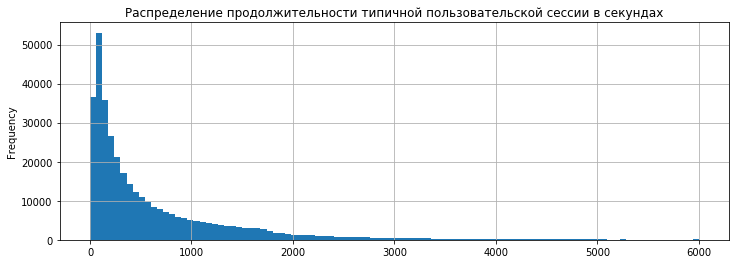

In [109]:
visits['ts_duration'].plot(kind='hist', bins=100, grid=True, figsize=(12, 4), range=(0,6000), title='Распределение продолжительности типичной пользовательской сессии в секундах');

Пуассон бы гордился. Много людей быстро выходят.
Смущают нулевые показатели сессий. Сколько их?

In [110]:
print('Процент нулевых сессий:', round(100*len(visits.query('ts_duration == 0'))/len(visits), 2), '%')

Процент нулевых сессий: 9.96 %


Каждая десятая сессия с нулевым значением. Это много. Думаю, это техническая проблема (не зашел и сразу вышел, а, например, не получил ответа от сервера)

#### Retention Rate.

Для начала, разделим на когорты по месяцам.

In [111]:
first_ts = visits.groupby('uid')['ts_date'].min() 

In [112]:
first_ts.name = 'first_ts'
first_ts.head()

uid
11863502262781     2018-03-01
49537067089222     2018-02-06
297729379853735    2017-06-07
313578113262317    2017-09-18
325320750514679    2017-09-30
Name: first_ts, dtype: object

In [113]:
visits = visits.join(first_ts, on = 'uid')

In [114]:
visits['first_ts'] = pd.to_datetime(visits['first_ts'])

Разделим по "времени жизни".

In [115]:
visits['first_ts_month'] = visits['first_ts'].astype('datetime64[M]')
visits['cohort_lifetime'] = (visits['start_ts']
                             - visits['first_ts'])
visits['cohort_lifetime'] = (visits['cohort_lifetime'] / np.timedelta64(1, 'D')).astype('timedelta64[D]')
visits['cohort_lifetime'] = (visits['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int')

In [116]:
cohorts = visits.groupby(['first_ts_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_ts_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,976
2,2017-06-01,2,718
3,2017-06-01,3,805
4,2017-06-01,4,910


In [117]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_ts_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count.head()

,first_ts_month,cohort_users
0,2017-06-01,13259
13,2017-07-01,13140
25,2017-08-01,10181
36,2017-09-01,16704
46,2017-10-01,25977


In [118]:
cohorts = cohorts.merge(initial_users_count, on='first_ts_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
cohorts.head()

,first_ts_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,976,13259,0.073610
2,2017-06-01,2,718,13259,0.054152
3,2017-06-01,3,805,13259,0.060713
4,2017-06-01,4,910,13259,0.068633


In [119]:
retention_pivot = cohorts.query('cohort_lifetime != 0').pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum') 
retention_pivot.reset_index()
retention_pivot

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11,12
first_ts_month,,,,,,,,,,,,
2017-06-01,0.073610,0.054152,0.060713,0.068633,0.067200,0.063655,0.056037,0.055660,0.050230,0.041255,0.040275,0.012595
2017-07-01,0.056240,0.052359,0.053196,0.056164,0.049315,0.044673,0.049696,0.036758,0.029604,0.023973,0.005479,NaN
2017-08-01,0.068952,0.062175,0.058737,0.050781,0.042825,0.041057,0.034378,0.028976,0.023377,0.002848,NaN,NaN
2017-09-01,0.075670,0.067289,0.048910,0.039511,0.040230,0.033046,0.026102,0.019816,0.002574,NaN,NaN,NaN
2017-10-01,0.073103,0.052970,0.037995,0.036109,0.031374,0.021096,0.017977,0.003234,NaN,NaN,NaN,NaN
2017-11-01,0.068739,0.046829,0.038278,0.031342,0.024222,0.018497,0.002752,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.050974,0.041080,0.028930,0.021569,0.016384,0.002770,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.053439,0.036289,0.025548,0.017150,0.001945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.047889,0.026850,0.018020,0.002027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Retention Rate получен! Визиализируем его.

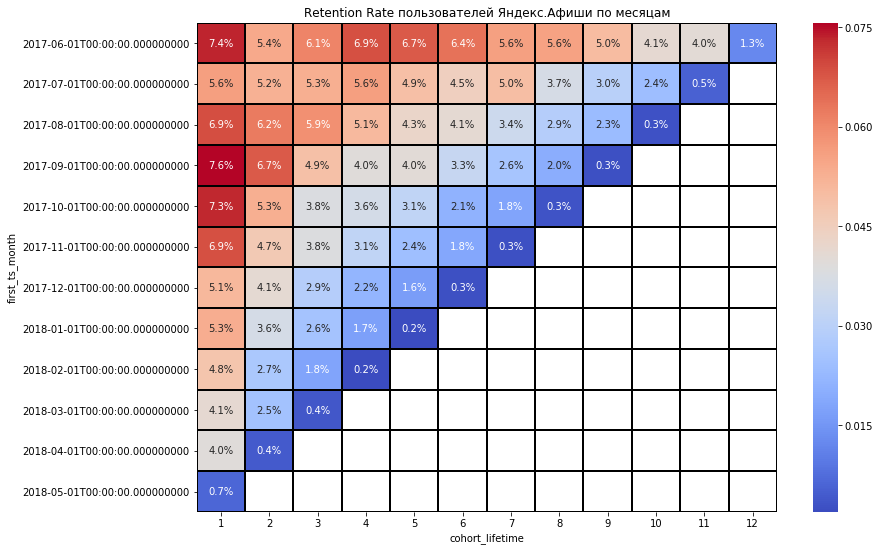

In [120]:
plt.figure(figsize=(13, 9))
plt.title('Retention Rate пользователей Яндекс.Афиши по месяцам')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', cmap='coolwarm', linewidths=1, linecolor='black');

Относительно медленно, но повторное пользование во всех когортах плавно стремится к нулю.

Найдем средний Retention Rate на второй месяц «жизни» когорт.

In [121]:
retention_pivot[1].mean()

0.05467842955887727

5.5 % - в среднем столько посетителей Яндекс.Афиши пользуются сервисом и на второй месяц, после первого посещения.

### Метрики электронной коммерции

#### Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

Некоторые клиенты заходили не раз. Сгруппируем по первой сессии.

In [122]:
first = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()

In [123]:
order_time = orders.merge(first, on='uid', how='inner') # Объединим с датафреймом с заказами

In [124]:
order_time['order_time'] = order_time['buy_ts'] - order_time['start_ts']
order_time['order_time'].describe()

count                      50415
mean     37 days 00:53:06.287414
std      70 days 14:39:40.373203
min              0 days 00:00:00
25%              0 days 00:06:00
50%              0 days 03:26:00
75%             38 days 09:22:30
max            364 days 08:29:00
Name: order_time, dtype: object

Вот так разница. Медианное время до покупки занимает 3.5 часа, в то время как среднее время до покупки занимает 37 дней, или же...

In [125]:
order_time['order_time'].mean()  / np.timedelta64(1, 'M')

1.2168423442471097

1.2 месяца :) Выбросы очень сильно влияют на статистику.

In [126]:
sp.stats.trim_mean(order_time['order_time'], 0.05)

numpy.timedelta64(-148185342639279,'ns')

#### Среднее количество покупок на одного покупателя за определённый период

Исходя из наших данных, сравним два периода: части 2017 года, и части 2018 года.

In [127]:
print('Среднее количество покупок на одного покупателя за 2017 г.:')
print(round(orders.query('buy_ts < "2018-01-01"').groupby('uid').agg({'buy_ts':'count'}).buy_ts.mean(), 3), 'покупки на одного человека')

Среднее количество покупок на одного покупателя за 2017 г.:
1.327 покупки на одного человека


In [128]:
print('Среднее количество покупок на одного покупателя за 2018 г.:')
print(round(orders.query('buy_ts >= "2018-01-01"').groupby('uid').agg({'buy_ts':'count'}).buy_ts.mean(), 3), 'покупки на одного человека')

Среднее количество покупок на одного покупателя за 2018 г.:
1.315 покупки на одного человека


Разница несущественная :)

Сделаем по аналогии с Retention Rate, только **cohort_lifetime** будет определяться разницой между первым посещением и первой покупкой.

In [129]:
first_visits1 = visits.groupby(['uid']).agg({'start_ts': 'min','source_id': 'first' }).reset_index()
first_visits1.columns = ['uid', 'first_session_start', 'source_id']
first_orders1 = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_orders1.columns = ['uid', 'first_buy']
sales1 = pd.merge(first_visits1, first_orders1, on = 'uid')

In [130]:
sales1.head()

,uid,first_session_start,source_id,first_buy
0,313578113262317,2017-09-18 22:49:00,2,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,10,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,3,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,5,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,5,2017-11-24 10:14:00


In [131]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]')

In [132]:
sales1['first_buy_month'] = sales1['first_buy'].astype('datetime64[M]')
sales1['first_session_month'] = sales1['first_session_start'].astype('datetime64[M]')
sales1['cohort_lifetime']= ((sales1['first_buy_month'] - sales1['first_session_month'])/np.timedelta64(1,'M')).round().astype(int)
sales1.head()

,uid,first_session_start,source_id,first_buy,first_buy_month,first_session_month,cohort_lifetime
0,313578113262317,2017-09-18 22:49:00,2,2018-01-03 21:51:00,2018-01-01,2017-09-01,4
1,1575281904278712,2017-06-03 10:13:00,10,2017-06-03 10:13:00,2017-06-01,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,3,2017-10-11 18:33:00,2017-10-01,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,5,2018-01-28 15:54:00,2018-01-01,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,5,2017-11-24 10:14:00,2017-11-01,2017-11-01,0


In [133]:
cohorts1 = pd.merge(orders, sales1, how='inner', on='uid')\
.groupby(['first_session_month', 'month'])\
.agg({'uid': 'count'}).reset_index()
cohorts1 = cohorts1.rename(columns={'uid':'sales_count'})
cohorts1_1 = cohorts1.pivot_table(index='first_session_month',values='sales_count',aggfunc='cumsum')
cohorts1_1 = cohorts1_1.rename(columns={'sales_count':'sales_count_cumsum'})
cohorts1 = cohorts1.join(cohorts1_1)
cohorts1.head()
# sales_count - количество покупок по когортам и месяцам
# sales_count_cumsum - куммулятивная сумма по когортам (т.к. метрика накопительная)

,first_session_month,month,sales_count,sales_count_cumsum
0,2017-06-01,2017-06-01,2354,2354
1,2017-06-01,2017-07-01,387,2741
2,2017-06-01,2017-08-01,273,3014
3,2017-06-01,2017-09-01,442,3456
4,2017-06-01,2017-10-01,516,3972


In [134]:
cohorts2 = sales1.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid':'count'}).reset_index()
cohorts2 = cohorts2.rename(columns={'uid':'cohort_users'})
cohorts1 = cohorts1.join(cohorts2[['cohort_lifetime','cohort_users']])

In [135]:
cohorts2.head()
# Здесь мы вычислили количество людей по каждой когорте 

,first_session_month,cohort_lifetime,cohort_users
0,2017-06-01,0,2023
1,2017-06-01,1,170
2,2017-06-01,2,67
3,2017-06-01,3,107
4,2017-06-01,4,119


In [136]:
cohorts1['retention'] = cohorts1['sales_count']/cohorts1['cohort_users']
cohorts1['retention_cumsum'] = cohorts1['sales_count_cumsum']/cohorts1['cohort_users']
cohorts1.head()
# На всякий случай поделил обе метрики на количество людей

,first_session_month,month,sales_count,sales_count_cumsum,cohort_lifetime,cohort_users,retention,retention_cumsum
0,2017-06-01,2017-06-01,2354,2354,0,2023,1.163618,1.163618
1,2017-06-01,2017-07-01,387,2741,1,170,2.276471,16.123529
2,2017-06-01,2017-08-01,273,3014,2,67,4.074627,44.985075
3,2017-06-01,2017-09-01,442,3456,3,107,4.130841,32.299065
4,2017-06-01,2017-10-01,516,3972,4,119,4.336134,33.378151


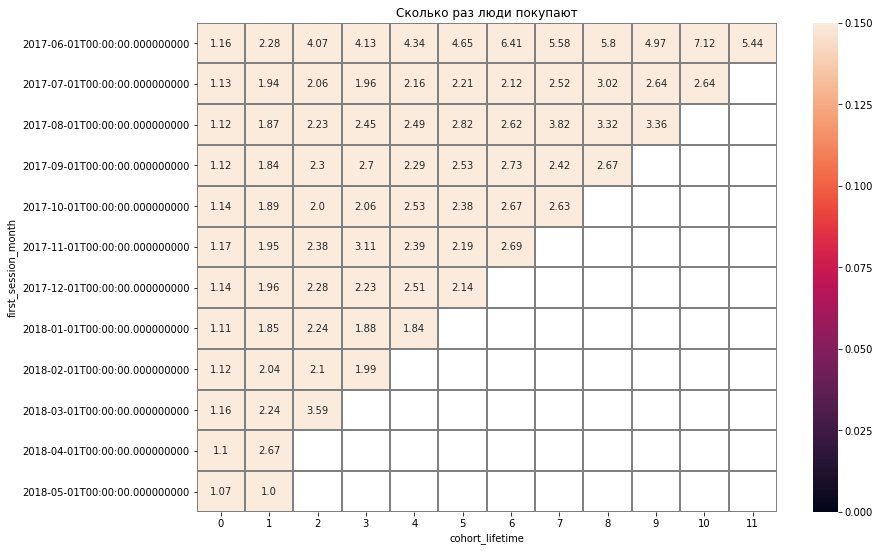

In [137]:
retention_pivot1 = cohorts1.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')


plt.figure(figsize=(13, 9))
plt.title('Сколько раз люди покупают')
sns.heatmap(retention_pivot1, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin=0, vmax=0.15);


Проверим, сколько раз за один месяц покупают в среднем:

In [138]:
print(orders.groupby('month').agg({'uid': 'nunique'}).reset_index().mean())

uid    3155.307692
dtype: float64


3155 раз!

#### Средний чек (Average Order Value)

Найдем значение по месяцам и по дням. Сгруппируем.

In [139]:
orders['date'] = orders['buy_ts'].astype('datetime64[D]')
orders['month'] = orders['buy_ts'].astype('datetime64[M]')

In [140]:
aov = orders.groupby('month').agg({'revenue': 'sum', 'uid': 'nunique'})

Теперь найдем средний чек за каждый месяц и выведем на график.

In [141]:
aov['aov'] = aov['revenue'] / aov['uid']
aov

,revenue,uid,aov
month,,,
2017-06-01,9557.49,2023,4.724414
2017-07-01,12539.47,1984,6.320297
2017-08-01,8758.78,1472,5.950258
2017-09-01,18345.51,2750,6.671095
2017-10-01,27987.70,4675,5.986674
2017-11-01,27069.93,4547,5.953360
2017-12-01,36388.60,4942,7.363132
2018-01-01,19417.13,3898,4.981306
2018-02-01,25560.54,4258,6.002945


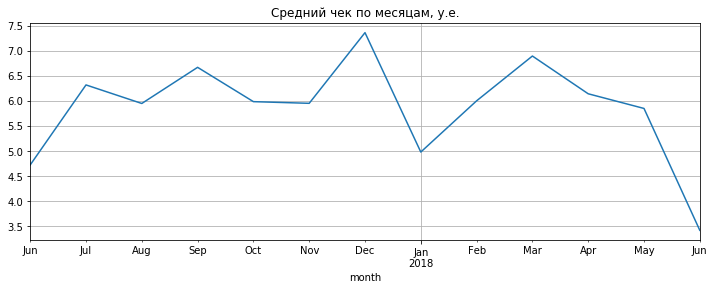

In [142]:
aov.aov.plot(grid=True, figsize=(12, 4), title='Средний чек по месяцам, у.е.');

In [143]:
aov['aov'].mean()

5.866513626792354

Согласно нашему исследованию, средний чек находится на дне в январе и июле - всего 5 у.е., обратная ситуация весной и осенью. Пик - в декабре со значение 7.36 у.е.

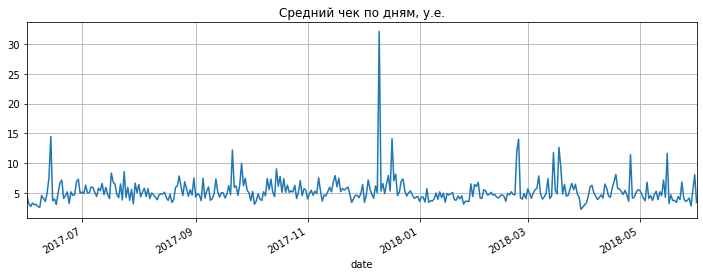

In [144]:
aovday = orders.groupby('date').agg({'revenue': 'sum', 'uid': 'nunique'})
aovday['aov'] = aovday['revenue'] / aovday['uid']
aovday.aov.plot(grid=True, figsize=(12, 4), title='Средний чек по дням, у.е.');

In [145]:
aovday['aov'].mean()

5.33093075333997

В среднем, AOV колеблется в районе 5.3 у.е. Исключения составляют около 10-15 дней в году. 

Один особенно выделяется. Что за день такой интересный, аномальный?

In [146]:
aovday.query('aov > 30')

,revenue,uid,aov
date,,,
2017-12-10,4661.33,145,32.147103


Надеюсь, из этих 145 человек никто не покупал билет на Тони Роббинса.

#### LTV.

Построим месячные когорты по аналогии с Retention Rate.

In [147]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [148]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [149]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_clients']
cohort_sizes.head()

,first_order_month,n_clients
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [150]:
orders_new = pd.merge(orders,first_orders, on='uid')

In [151]:
orders_new.head()

,buy_ts,revenue,uid,month,date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


In [152]:
order_cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
order_cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [153]:
report = pd.merge(cohort_sizes, order_cohorts, on='first_order_month') 

Заданная маржинальность - 100 %. Поэтому за валовую прибыль принимаем общую прибыль. Ее делим на количество клиентов и получаем LTV по когортам!

In [154]:
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_clients']
report.head()

,first_order_month,n_clients,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


Построим таблицу изменений LTV во времени и визуализируем во времени ее.

In [155]:
ltv = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')

In [156]:
ltv = ltv.cumsum(axis=1) # Не забываем, что LTV — накопительная метрика
ltv.reset_index().fillna('')

age,first_order_month,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
1,2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2,2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
3,2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
4,2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
5,2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
6,2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
7,2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
8,2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,
9,2018-03-01,4.838803,5.13969,5.45525,,,,,,,,,


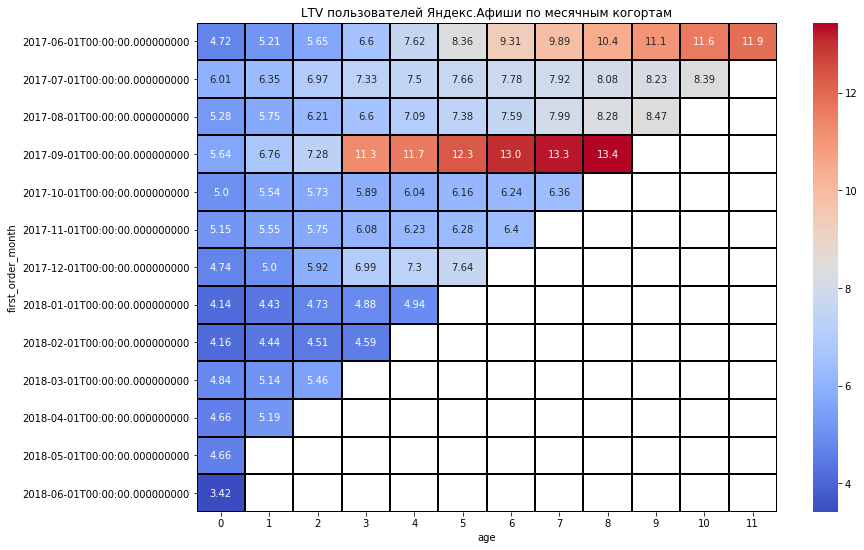

In [157]:
plt.figure(figsize=(13, 9))
plt.title('LTV пользователей Яндекс.Афиши по месячным когортам')
sns.heatmap(ltv, annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

Данные не самые однозначные. За исключением нескольких когорт ("покрасневших", очевидно, от выбросов), темпы накопления LTV по мере увеличения месяца жизни - угасают. По-моему, это звоночек о постепенном падении прибыли сервиса.

Рассчитаем средний LTV по когортам за 6 месяцев (в расчёт включаем только когорты, «прожившие» не менее 6 месяцев - с июня по ноябрь включительно).

In [158]:
round(ltv.mean(axis=0)[5], 3)

7.969

Средний LTV по когортам за первые полгода - почти 8 у.е.

### Маркетинговые метрики

#### Расходы на маркетинг.

In [159]:
costs.costs.sum()

329131.62

Всего затрачено 329131.62 у.е.

In [160]:
costs.costs.sum()/365

901.7304657534246

В среднем уходит 901 у.е. в день на рекламу.

In [161]:
spending = costs.groupby('source_id').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
spending['proportion'] = 100*(spending['costs']/costs.costs.sum())
spending

,costs,proportion
source_id,,
3,141321.63,42.937725
4,61073.60,18.555981
5,51757.10,15.725350
2,42806.04,13.005751
1,20833.27,6.329769
10,5822.49,1.769046
9,5517.49,1.676378


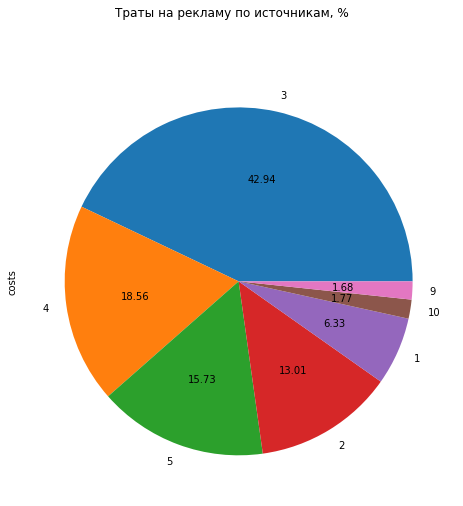

In [162]:
spending.costs.plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%.2f', title='Траты на рекламу по источникам, %');

3 источник трафика - самый <a id='cell'>ресурсозатратный</a>. Почти 43 % всех расходов пришлось  на этот канал. 10 и 9 - самые "дешевые".

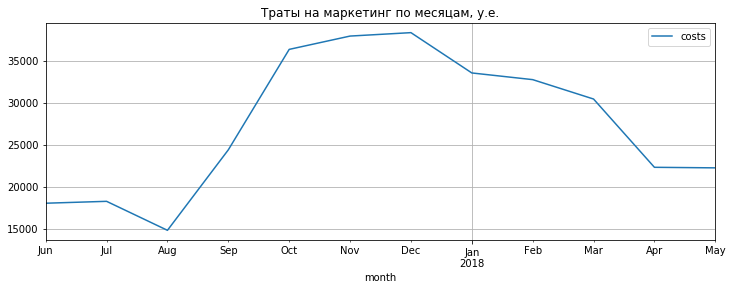

In [163]:
costs['month'] = costs['dt'].astype('datetime64[M]')
cbm = costs.groupby('month').agg({'costs': 'sum'}) # cbm - costs by month
cbm.plot(grid=True, figsize=(12, 4), title='Траты на маркетинг по месяцам, у.е.');

Посмотрим по источникам.

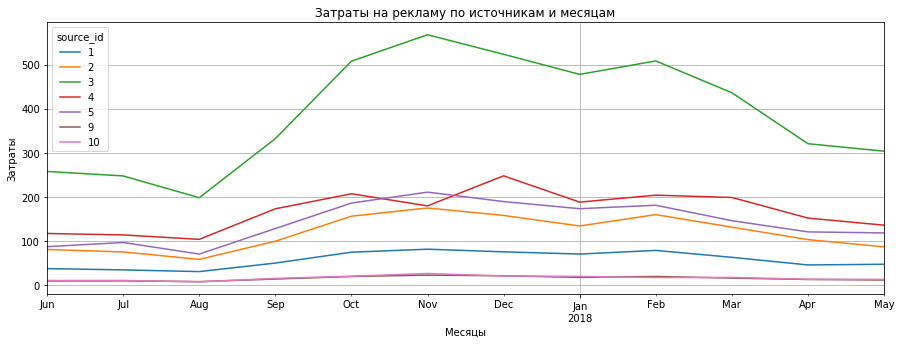

In [164]:
costs.pivot_table(index= 'month',columns = 'source_id', values='costs').plot(figsize=(15,5), grid = True).set_title('Затраты на рекламу по источникам и месяцам')
plt.ylabel("Затраты")
plt.xlabel("Месяцы")
plt.show()

Летом все отдыхают - и затрат меньше. По источникам значения более-менее кореллируют.

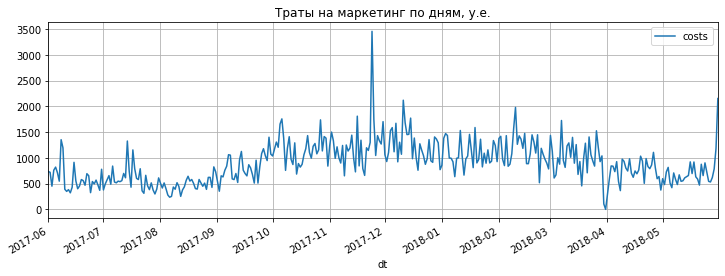

In [165]:
cbd = costs.groupby('dt').agg({'costs': 'sum'}) # cbm - costs by day
cbd.plot(grid=True, figsize=(12, 4), title='Траты на маркетинг по дням, у.е.');

Ничего не напоминает?

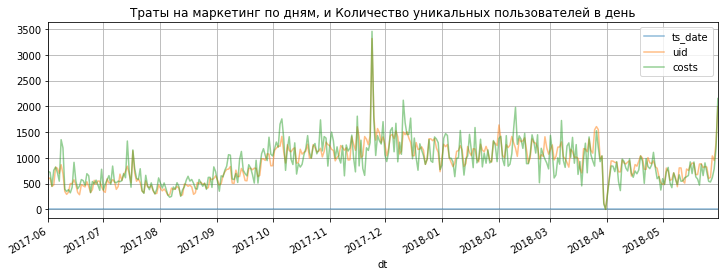

In [166]:
ax = dau.plot(grid=True, figsize=(12, 4), alpha=0.5);
cbd.plot(grid=True, figsize=(12, 4), alpha=0.5, ax=ax, title='Траты на маркетинг по дням, и Количество уникальных пользователей в день');

Корелляция налицо. Количество уников и траты на маркетинг по дням идут рука об руку. Значит, маркетинг свое дело делает преимущественно верно.

#### CAC

Для начала найдем **CAC** для всего проекта: поделим общие затраты на количество уникальных клиентов.

In [167]:
print('Cтоимость привлечения одного клиента за весь изучаемый год: ', 
      round(costs.costs.sum()/cohort_sizes.n_clients.sum(), 3), 'у.е.')

Cтоимость привлечения одного клиента за весь изучаемый год:  9.012 у.е.


Для расчета **САС** по источникам трафика, найдем затраты и количество клиентов по каждому.

In [168]:
# считаем расходы по источникам
traffic_costs = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
traffic_costs1 = costs.groupby(['month','source_id']).agg({'costs': 'sum'}).reset_index()
traffic_costs1.head() 

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [169]:
source_buyers = visits[['uid', 'source_id']].merge(orders, on='uid')
source_buyers.head()

,uid,source_id,buy_ts,revenue,month,date,order_month
0,16174680259334210214,9,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-09,2018-03-01
1,16174680259334210214,4,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-09,2018-03-01
2,16007536194108375387,5,2017-09-04 12:46:00,2.44,2017-09-01,2017-09-04,2017-09-01
3,16007536194108375387,5,2017-10-28 00:01:00,1.53,2017-10-01,2017-10-28,2017-10-01
4,16007536194108375387,5,2017-10-28 19:16:00,1.53,2017-10-01,2017-10-28,2017-10-01


In [170]:
# считаем количество клиентов по источникам
traffic_unique = source_buyers.groupby('source_id').agg({'uid': 'nunique'})
traffic_unique.head() 

,uid
source_id,
1,7138
2,7305
3,13846
4,14253
5,10156


In [171]:
cac = traffic_costs.merge(traffic_unique, on='source_id')
cac['cac'] = cac['costs'] / cac['uid']
cac.head()

,source_id,costs,uid,cac
0,1,20833.27,7138,2.918642
1,2,42806.04,7305,5.859828
2,3,141321.63,13846,10.206676
3,4,61073.60,14253,4.284965
4,5,51757.10,10156,5.096209


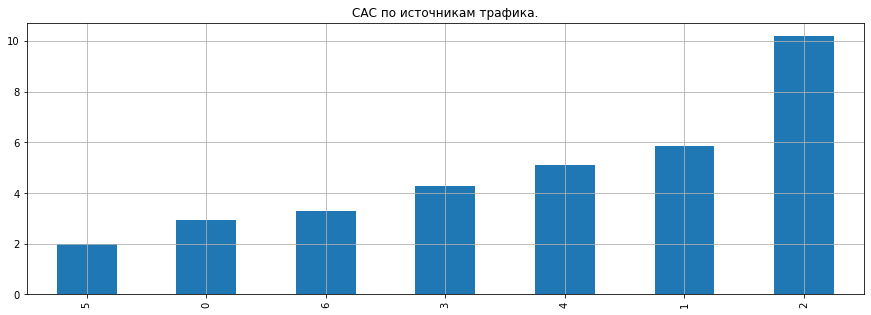

In [172]:
cac.sort_values('cac').cac.plot.bar(figsize=(15,5), grid=True, title='САС по источникам трафика.');

Стоит сравнить с количеством привлеченных клиентов:

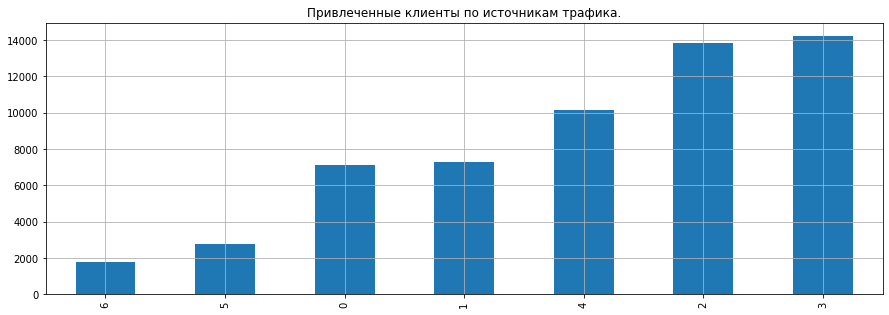

In [173]:
cac.sort_values('uid').uid.plot.bar(figsize=(15,5), grid=True, title='Привлеченные клиенты по источникам трафика.');

Что ж, если с 3, 5, 9 и 10 источниками все понятно - значения более менее кореллируют, то к 2 источнику есть вопросы: стоит дороже, а привлекают клиентов меньше. Чего не скажешь о 4 и 5 - при относительно недорогой цене за покупателя, привлекли они гораздо больше - это эффективные каналы!

In [174]:
sales1['first_buy_month'] = sales1['first_buy'].astype('datetime64[M]')
cohort_sizes1 = sales1.pivot_table(
        index= ['first_buy_month', 'source_id'], 
        values='uid', 
        aggfunc= {'uid' : pd.Series.nunique}).reset_index()
cohort_sizes1.columns = ['month', 'source_id', 'n_buyers']
cohort_sizes1.head()

,month,source_id,n_buyers
0,2017-06-01,1,203
1,2017-06-01,2,271
2,2017-06-01,3,574
3,2017-06-01,4,417
4,2017-06-01,5,368


In [175]:
buyers = pd.merge(cohort_sizes1, traffic_costs1, on = ['month', 'source_id'])
buyers['cac'] = buyers['costs'] / buyers['n_buyers']
buyers.head()

,month,source_id,n_buyers,costs,cac
0,2017-06-01,1,203,1125.61,5.544877
1,2017-06-01,2,271,2427.38,8.957122
2,2017-06-01,3,574,7731.65,13.469774
3,2017-06-01,4,417,3514.80,8.428777
4,2017-06-01,5,368,2616.12,7.109022


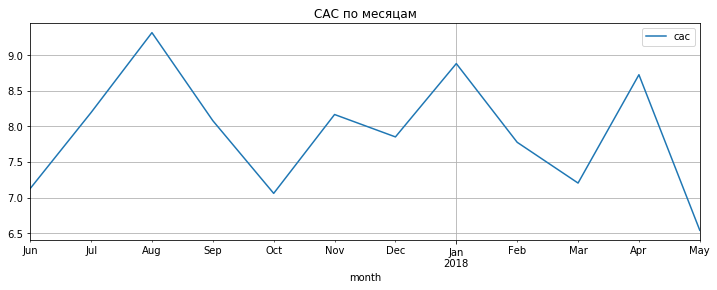

In [176]:
buyers.pivot_table(index='month',
                   values='cac', aggfunc='mean').plot(figsize=(12,4), grid = True).set_title('САС по месяцам'); 

Затраты в августе и январе на клиента выше, в мае и октябре - ниже.

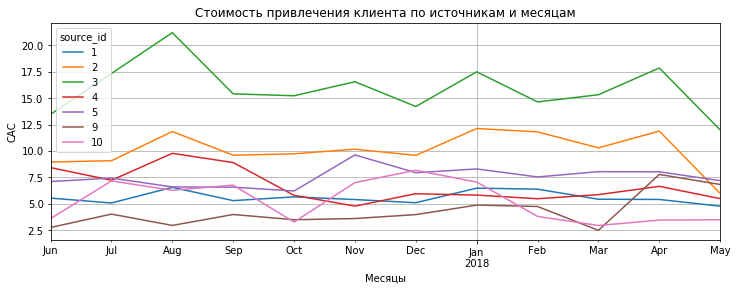

In [177]:
buyers.pivot_table(index= 'month',columns='source_id',
                   values='cac').plot(figsize=(12,4), grid = True).set_title('Стоимость привлечения клиента по источникам и месяцам')
plt.ylabel("САС")
plt.xlabel("Месяцы")
plt.show()

Отобразим затраты на рекламу по источникам и месяцам на накопительной диаграмме.

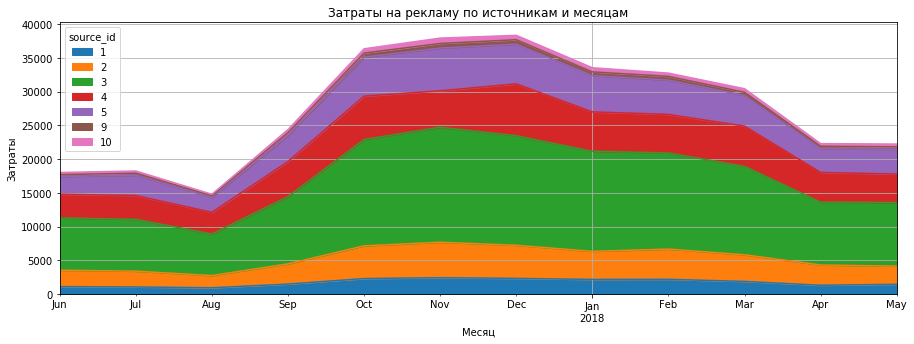

In [179]:
buyers.pivot_table(index= 'month',columns='source_id',
                   values='costs').plot.area(figsize=(15,5), grid = True).set_title('Затраты на рекламу по источникам и месяцам')
plt.ylabel("Затраты")
plt.xlabel("Месяц")
plt.show()

#### ROMI 

Находим CAC по аналогии выше, с расчетом на разрез источников. 

In [104]:
first_visits = visits.groupby(['uid']).agg({'ts_month': 'min','source_id': 'first' }).reset_index()
first_visits.columns = ['uid', 'first_visit_month', 'source_id']
sales = first_visits.merge(first_orders, on='uid')
sales.head()

,uid,first_visit_month,source_id,first_order_month
0,313578113262317,2,2,2018-01-01
1,1575281904278712,6,10,2017-06-01
2,2429014661409475,10,3,2017-10-01
3,2464366381792757,1,5,2018-01-01
4,2551852515556206,11,5,2017-11-01


In [105]:
romi_cohort_sizes = sales.pivot_table(
        index= ['first_order_month', 'source_id'], 
        values=['uid'], 
        aggfunc= {'uid' : 'nunique'}).reset_index()
romi_cohort_sizes.columns = ['first_order_month', 'source_id', 'n_buyers']
romi_cohort_sizes.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,203
1,2017-06-01,2,271
2,2017-06-01,3,574
3,2017-06-01,4,417
4,2017-06-01,5,368


In [106]:
romi_orders = orders.merge(sales, on='uid')
romi_orders.head()

,buy_ts,revenue,uid,month,date,order_month,first_visit_month,source_id,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,6,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,6,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,6,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,6,2,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,6,3,2017-06-01


In [107]:
romi_cohorts = romi_orders.groupby(['first_order_month','order_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()
romi_cohorts.head()

,first_order_month,order_month,source_id,revenue
0,2017-06-01,2017-06-01,1,1168.45
1,2017-06-01,2017-06-01,2,1551.76
2,2017-06-01,2017-06-01,3,2466.71
3,2017-06-01,2017-06-01,4,2039.64
4,2017-06-01,2017-06-01,5,1787.68


In [108]:
romi_report = romi_cohort_sizes.merge(romi_cohorts, on= ['first_order_month', 'source_id'])
romi_report.head()

,first_order_month,source_id,n_buyers,order_month,revenue
0,2017-06-01,1,203,2017-06-01,1168.45
1,2017-06-01,1,203,2017-07-01,362.94
2,2017-06-01,1,203,2017-08-01,153.72
3,2017-06-01,1,203,2017-09-01,695.88
4,2017-06-01,1,203,2017-10-01,760.74


Напоминаем, что маржинальность принимаем равной единице, поэтому валовую прибыль считаем равную общей.

In [109]:
romi_report['age'] = (romi_report['order_month'] - romi_report['first_order_month']) / np.timedelta64(1, 'M')
romi_report['age'] = romi_report['age'].round().astype('int')
# Считаем LTV
romi_report['ltv'] = romi_report['revenue'] / romi_report['n_buyers']
romi_output = romi_report.pivot_table(
        index='first_order_month', 
        columns=['age', 'source_id'], 
        values='ltv', 
        aggfunc='mean')
romi_output.fillna('')

age                     0                                              \
source_id               1        2        3         4        5     7    
first_order_month                                                       
2017-06-01         5.75591  5.72605   4.2974  4.891223  4.85783         
2017-07-01         7.68754  7.12132  5.19673  6.381926  5.26007         
2017-08-01           6.124  5.72928  5.51641  4.948571  5.01538  1.22   
2017-09-01         7.58883  8.74273  5.00121  5.142247  4.97872         
2017-10-01         6.07822  7.48351   4.3654  4.388752  5.30162         
2017-11-01         5.79777  6.33663  4.81182  5.253956  4.55581         
2017-12-01         4.44697  7.34088  4.31821  4.149364  5.15007         
2018-01-01         6.08472  4.37662  3.99564  3.808680   3.9941         
2018-02-01         5.01562   4.5276  3.87534  4.147137  4.29329         
2018-03-01         7.56305  5.86358  4.40815  4.495232  4.98595         
2018-04-01         5.62118   5.6321   3.8782  5.059804  4.39119         
2018-05-01          5.4185  6.39833  3.80975  4.714772    4.124         
2018-06-01                                    3.420000                  

age                                        1             ...         10  \
source_id               9        10        1         2   ...         3    
first_order_month                                        ...              
2017-06-01          3.4001  2.21885   1.78788   1.03399  ...   0.045784   
2017-07-01         5.58907  3.25826  0.995924  0.659027  ...  0.0410384   
2017-08-01         4.80964  4.62459  0.359724  0.888301  ...              
2017-09-01         3.84442  2.29147  0.904452   7.00569  ...              
2017-10-01         4.13615  2.59712   1.08472   2.35588  ...              
2017-11-01         4.19508  4.40593  0.454735  0.923217  ...              
2017-12-01         3.67352  3.64089  0.204716   1.34476  ...              
2018-01-01         3.13045  3.10333   1.26338  0.261137  ...              
2018-02-01         3.78474  2.56103   1.23246  0.293562  ...              
2018-03-01         2.66448  3.21298   2.17072  0.187258  ...              
2018-04-01         5.01083  2.49107   2.33473  0.592063  ...              
2018-05-01         3.78075  4.09342                      ...              
2018-06-01                                               ...              

age                                                       11           \
source_id                 4          5          9         1        2    
first_order_month                                                       
2017-06-01          0.529017   0.256495  0.0533981  0.545123  1.00428   
2017-07-01         0.0201639  0.0212407     0.0716                      
2017-08-01                                                              
2017-09-01                                                              
2017-10-01                                                              
2017-11-01                                                              
2017-12-01                                                              
2018-01-01                                                              
2018-02-01                                                              
2018-03-01                                                              
2018-04-01                                                              
2018-05-01                                                              
2018-06-01                                                              

age                                                         
source_id                3         4         5          10  
first_order_month                                           
2017-06-01         0.058554  0.133405  0.126576  0.0112644  
2017-07-01                                                  
2017-08-01                                                  
2017-09-01                                                  
2017-10-01                        

Рассчитаем САС

In [110]:
# Вычислим затраты и по месячной и по источниковой когортах.
costs_pivot = costs.pivot_table(
        index= ['month', 'source_id'], 
        values='costs', 
        aggfunc='sum').reset_index()
costs_pivot.columns = ['first_order_month', 'source_id', 'costs']

In [111]:
romi_report = pd.merge(romi_report, costs_pivot, on = ['first_order_month', 'source_id'])
romi_report['cac'] = romi_report['costs'] / romi_report['n_buyers']
romi_report.head()

,first_order_month,source_id,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06-01,1,203,2017-06-01,1168.45,0,5.755911,1125.61,5.544877
1,2017-06-01,1,203,2017-07-01,362.94,1,1.787882,1125.61,5.544877
2,2017-06-01,1,203,2017-08-01,153.72,2,0.757241,1125.61,5.544877
3,2017-06-01,1,203,2017-09-01,695.88,3,3.427980,1125.61,5.544877
4,2017-06-01,1,203,2017-10-01,760.74,4,3.747488,1125.61,5.544877


Находим ROMI.

In [112]:
romi_report['romi'] = romi_report['ltv'] / romi_report['cac']
romi_output  = romi_report.pivot_table(
        index= 'first_order_month', 
        columns=['source_id','age'], 
        values='romi', 
        aggfunc='mean')
romi_output

source_id                1                                                     \
age                      0         1         2         3         4         5    
first_order_month                                                               
2017-06-01         1.038059  0.322439  0.136566  0.618225  0.675847  0.634847   
2017-07-01         1.511884  0.195865  0.777692  0.229532  0.075582  0.142914   
2017-08-01         0.932938  0.054801  0.024343  0.064666  0.041132  0.018123   
2017-09-01         1.429844  0.170412  0.259552  0.245365  0.116404  0.048728   
2017-10-01         1.073514  0.191579  0.103431  0.059091  0.030664  0.016155   
2017-11-01         1.071746  0.084060  0.127979  0.067746  0.024117  0.005873   
2017-12-01         0.869943  0.040048  0.060161  0.044362  0.027046  0.026008   
2018-01-01         0.937960  0.194751  0.043487  0.123910  0.026265       NaN   
2018-02-01         0.784942  0.192880  0.027081  0.060282       NaN       NaN   
2018-03-01         1.390288  0.399035  0.195110       NaN       NaN       NaN   
2018-04-01         1.037439  0.430896       NaN       NaN       NaN       NaN   
2018-05-01         1.133462       NaN       NaN       NaN       NaN       NaN   

source_id                                                  ...        10  \
age                      6         7         8         9   ...        0    
first_order_month                                          ...             
2017-06-01         0.864136  0.353399  0.398451  0.560087  ...  0.614347   
2017-07-01         0.073009  0.098511  0.077763  0.080084  ...  0.454430   
2017-08-01         0.078440  0.064015  0.025677  0.040607  ...  0.735735   
2017-09-01         0.456795  0.150638  0.103674       NaN  ...  0.338246   
2017-10-01         0.032495  0.047199       NaN       NaN  ...  0.790846   
2017-11-01         0.014236       NaN       NaN       NaN  ...  0.628338   
2017-12-01              NaN       NaN       NaN       NaN  ...  0.445344   
2018-01-01              NaN       NaN       NaN       NaN  ...  0.439473   
2018-02-01              NaN       NaN       NaN       NaN  ...  0.671041   
2018-03-01              NaN       NaN       NaN       NaN  ...  1.086435   
2018-04-01              NaN       NaN       NaN       NaN  ...  0.718609   
2018-05-01              NaN       NaN       NaN       NaN  ...  1.168521   

source_id                                                                      \
age                      1         2         3         4         5         6    
first_order_month                                                               
2017-06-01         0.035198       NaN       NaN  0.001178       NaN       NaN   
2017-07-01         0.004821       NaN  0.009247       NaN       NaN       NaN   
2017-08-01         0.017844  0.052543       NaN       NaN       NaN  0.020252   
2017-09-01         0.012069  0.011331  0.035665  0.002648  0.003972  0.003169   
2017-10-01         0.022113  0.012467  0.007015  0.010714       NaN  0.005851   
2017-11-01         0.008317  0.002310  0.017669  0.018186  0.001855  0.007699   
2017-12-01              NaN  0.000464       NaN       NaN  0.009383       NaN   
2018-01-01         0.002279       NaN       NaN       NaN       NaN       NaN   
2018-02-01         0.013912  0.033044       NaN       NaN       NaN       NaN   
2018-03-01         0.022397  0.011949       NaN       NaN       NaN       NaN   
2018-04-01         0.042498       NaN       NaN       NaN       NaN       NaN   
2018-05-01              NaN       NaN       NaN       NaN       NaN       NaN   

source_id                                        
age                      7         8         11  
first_order_month                                
2017-06-01              NaN  0.002705  0.003119  
2017-07-01              NaN       NaN       NaN  
2017-08-01         0.039773       NaN       NaN  
2017-09-01         0.014718  0.010615       NaN  
2017-10-01              NaN       NaN       NaN  
2017-11-01              NaN

Исполин, трудный к прочтению, еще и ненакопленный.

Теперь выведем накопленный ROMI в разрезе источников трафика.

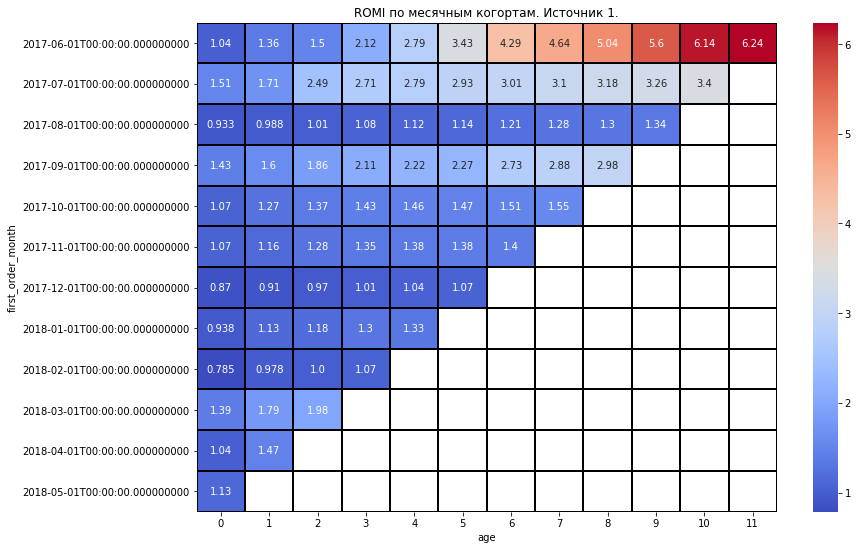

In [113]:
# Источник 1
romi_output1  = romi_report.query('source_id == 1').pivot_table(
        index= 'first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('ROMI по месячным когортам. Источник 1.')
sns.heatmap(romi_output1.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

Окупаемость уже на 1-3 месяцы жизни когорты! Недурно.

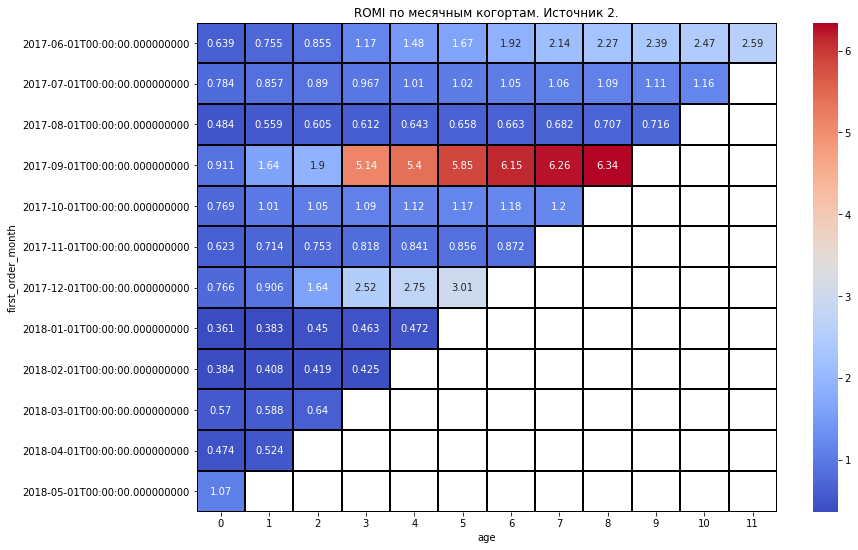

In [114]:
# Источник 2
romi_output2  = romi_report.query('source_id == 2').pivot_table(
        index= 'first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('ROMI по месячным когортам. Источник 2.')
sns.heatmap(romi_output2.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

Здесь окупаемость самая разная. Например сентябрьская и майские смогли окупиться практически за месяц. А некоторым не хватило "жизни" чтобы хоть сколько нибудь выйти в плюс.

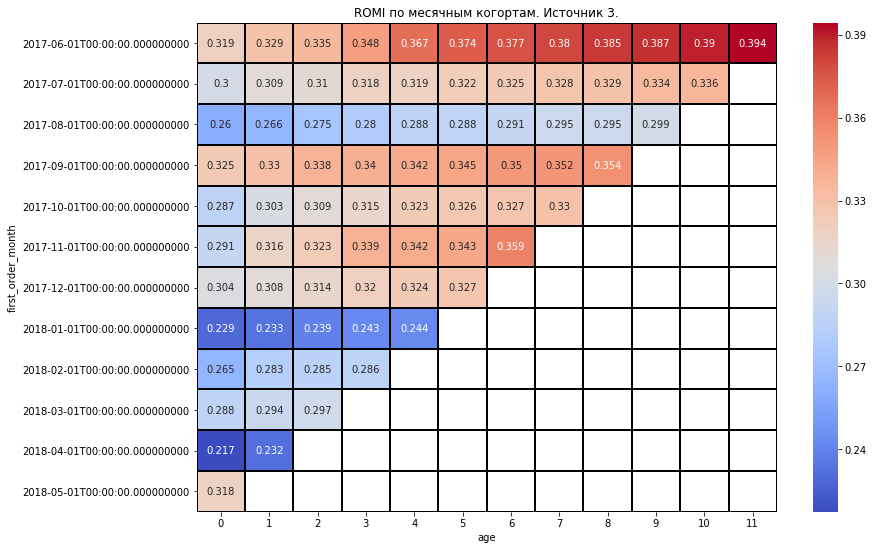

In [115]:
# Источник 3
romi_output3  = romi_report.query('source_id == 3').pivot_table(
        index= 'first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('ROMI по месячным когортам. Источник 3.')
sns.heatmap(romi_output3.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

Кажется, у нас кандидат на худший источник. Мало того, что ни одна когорта не окупилась, так и если [вспомним](#cell), этот источник - самый дорогой на душу клиентов, хоть и привлекает много клиентов. Может, только потому его и используют?

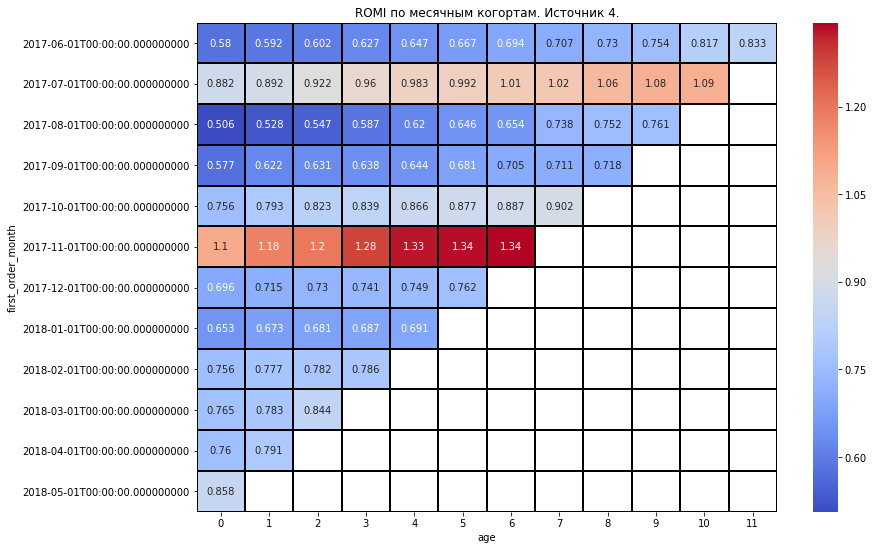

In [116]:
# Источник 4
romi_output4  = romi_report.query('source_id == 4').pivot_table(
        index= 'first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('ROMI по месячным когортам. Источник 4.')
sns.heatmap(romi_output4.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

Окупилось только 2 когорты - и то одна в первый же месяц: это, очевидно, исключение из правил. 

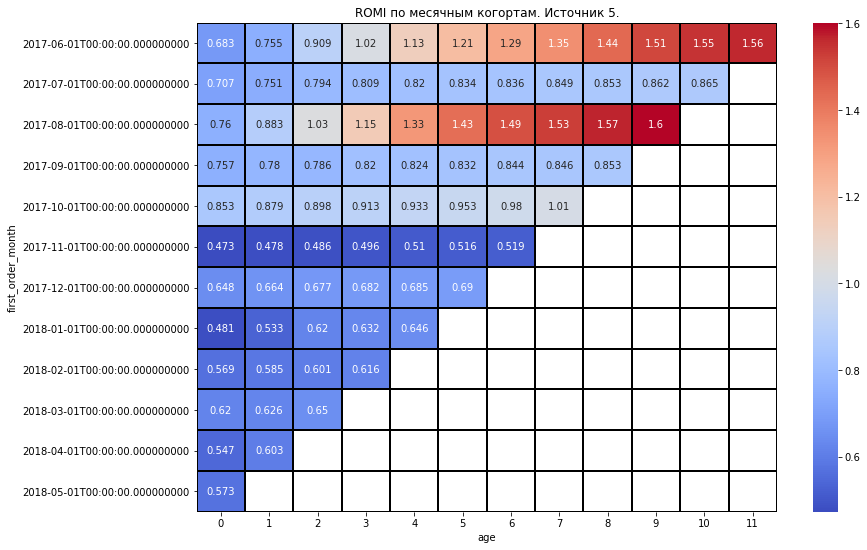

In [117]:
# Источник 5
romi_output5  = romi_report.query('source_id == 5').pivot_table(
        index= 'first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('ROMI по месячным когортам. Источник 5.')
sns.heatmap(romi_output5.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

3 когорты окупились. Интересно, что все идут на окупаемость зимой в этом источнике медленнее, чем летом. 

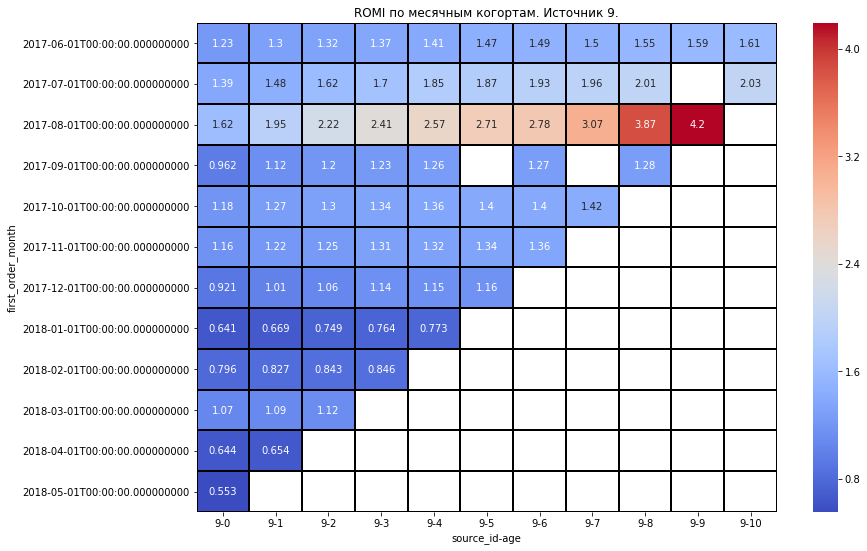

In [118]:
# Источник 9
romi_output9  = romi_report.query('source_id == 9').pivot_table(
        index= 'first_order_month', 
        columns=['source_id','age'], 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('ROMI по месячным когортам. Источник 9.')
sns.heatmap(romi_output9.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

Мало затрат - быстрее окупаемость. Видимо в этом секрет успеха 9 источника. Окупаемость у большинства в нулевой месяц. Жаль, что трафика он дает тоже мало.

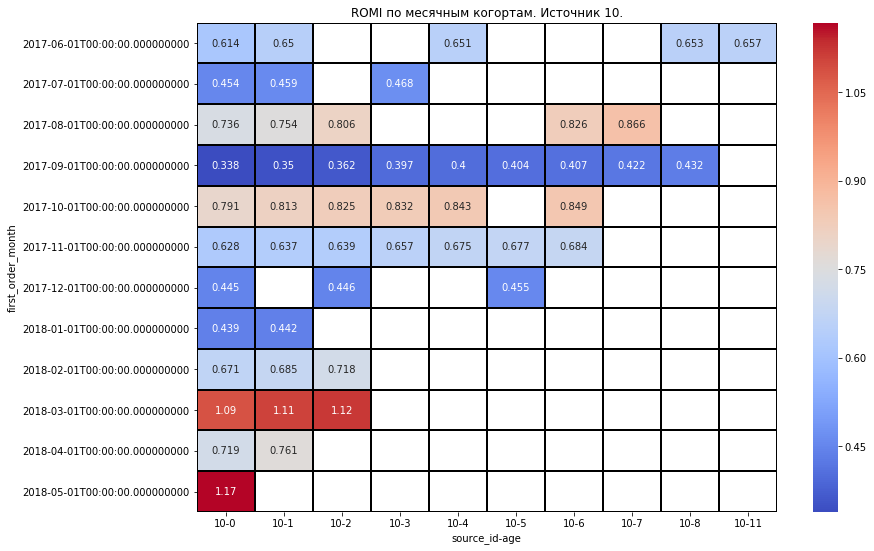

In [119]:
# Источник 10
romi_output10  = romi_report.query('source_id == 10').pivot_table(
        index= 'first_order_month', 
        columns=['source_id','age'], 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('ROMI по месячным когортам. Источник 10.')
sns.heatmap(romi_output10.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

10 источник больше похож на экспериментальный. Трафика тоже льется мало, окупаемость разная, достигающая результата только в последние месяцы. Связанно с сеознностью?

Наконец, выведем общий ROMI.

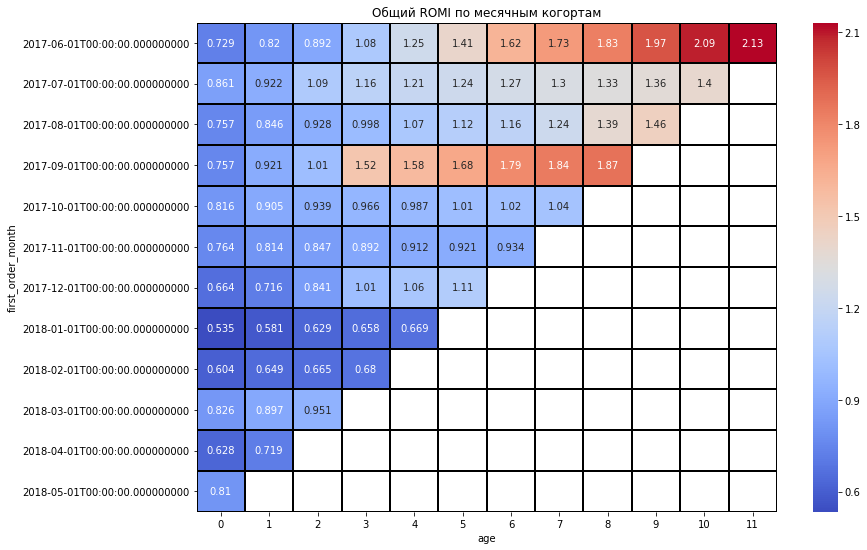

In [120]:
romi_output_full  = romi_report.pivot_table(
        index= 'first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
plt.figure(figsize=(13, 9))
plt.title('Общий ROMI по месячным когортам')
sns.heatmap(romi_output_full.cumsum(axis=1),
            annot=True, fmt='.3', cmap='coolwarm', linewidths=1, linecolor='black');

В среднем, окупаемость по месячным когортам падает: об этом говорят угасающие со времем данные. В среднем, лишь на 3-5 месяцы жизни начинают окупаться расходы.

## Выводы и рекомендации.

Взглянем на график ниже:

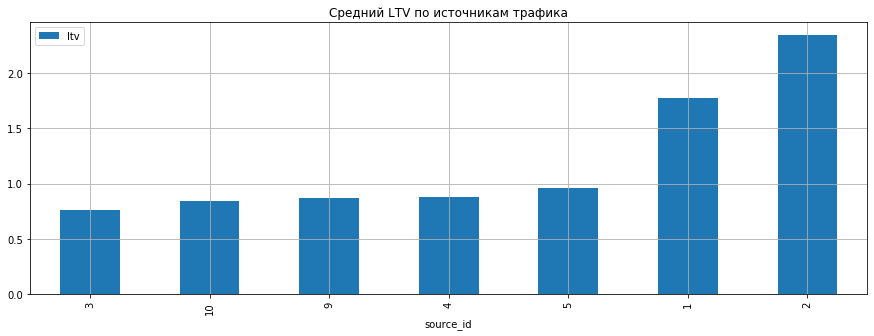

In [121]:
romi_report.groupby('source_id').agg({'ltv':'mean'}).sort_values('ltv').plot.bar(figsize=(15,5), title='Средний LTV по источникам трафика', grid=True);

- Каналы выведем по валовой прибыли на человека в порядке возрастания. С этой точки зрения, самые эффективные каналы - 1 и 2. На них стоит делать акцент. Даже по сроку окупаемости мы видим в них большое преимущество:

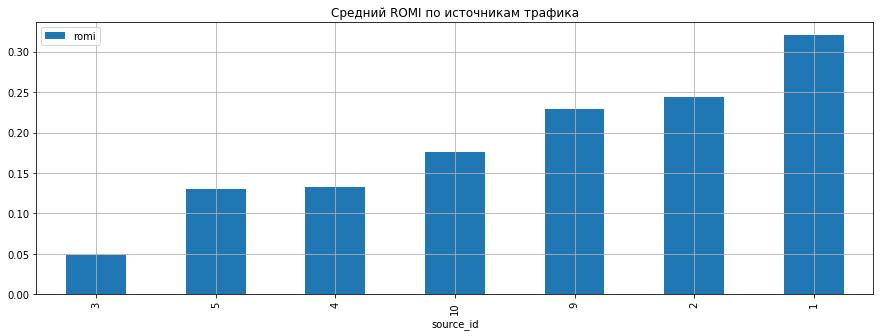

In [122]:
romi_report.groupby('source_id').agg({'romi':'mean'}).sort_values('romi').plot.bar(figsize=(15,5), title='Средний ROMI по источникам трафика', grid=True);

- 3 источник - везде в аутсайдерах по прибыли. Требует много затрат. И окупается долго. Да, среди уникальных посетителей сайта он дает много - 27 % от всех пользователей (см. ниже). Но с точки зрения бизнеса - это все равно неэффективно. 

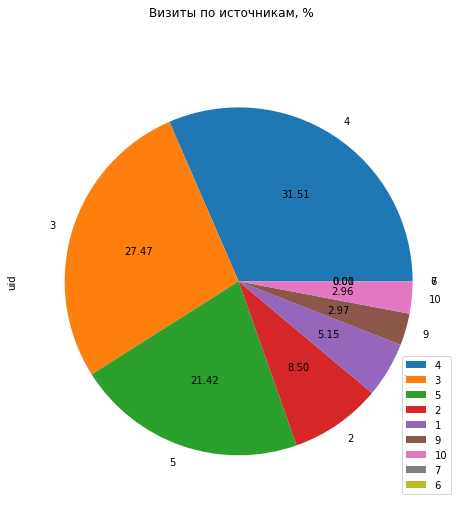

In [123]:
visit_by_sources = (
    first_visits.groupby('source_id')
    .agg({'uid': 'nunique'})
    .sort_values(by='uid', ascending=False)
    .plot(kind='pie', figsize=(8, 8), subplots=True, autopct='%.2f', title='Визиты по источникам, %')
)

- 4  и 5 источник - тоже в лидерах по по визитам, но их метрики электронной коммерции - средние, оставляют желать лучшего.

- Для 9 и 10, как по мне, очень мало данных. Точнее, они генерируют недостаточно трафика для полноценного анализа, но судя по тому, что есть - они себя ведут экономически очень выгодно.

- Фактор сезонности играет большую роль в жизни Я.Афиши: за исключением выбросов, наибольшая активность наблюдается в НЕлетнее время. Разумеется, это сезоны отпусков, время опустошения городов. 

- Судя по данным Retention Rate, довольно малый процент пользуется сервисом повторно: к примеру, 4 % в среднем повторных заказов на второй месяц жизни. Возможно, стоит дать больше ресурсов стимулированию повторного использования: ретаргетингу, накопительной системы баллов и т.п.

- Всего на рекламу затрачено 329131.62 у.е., или же 901 у.е. в день. Или 9 у.е. на одного клиента. Значение маркетинговых затрат в целом кореллирует с посетительской активностью.

In [124]:
print('Процент пользователей с активностью в не более чем минуту:', round(100*len(visits.query('ts_duration < 61'))/len(visits), 3), '%.') 
print('Процент десктоп-пользователей с активностью в не более чем минуту:', round(100*len(visits.query('ts_duration < 61 & device == "desktop"'))/len(visits.query('device == "desktop"')), 3), '%.') 
print('Процент тач-пользователей с активностью в не более чем минуту:', round(100*len(visits.query('ts_duration < 61 & device == "touch"'))/len(visits.query('device == "touch"')), 3), '%.') 

Процент пользователей с активностью в не более чем минуту: 24.956 %.
Процент десктоп-пользователей с активностью в не более чем минуту: 22.758 %.
Процент тач-пользователей с активностью в не более чем минуту: 30.916 %.


- Четверть посетителей очень быстро покидают сервис: на принятие этого решения им хватает минуты. Но у пользователей планшетов и смартфонов ситуация хуже, чем у пк-собратьев: 31 % против 23 % покидают сервис в течение 60 секунд. Кажется, мобильные версии стоит оптимизировать получше.

- В среднем, окупаемость по месячным когортам падает: об этом говорят угасающие со времем данные по ROMI. В среднем, лишь на 3-5 месяцы жизни начинают окупаться расходы. 

- Несмотря на зимнюю активность, окупаемость "зимних" когорт хуже летних: июньская, августовская, октябрьская - оказались самыми удачным по значению ROMI. Январьская, февральская, даже декабрьская (с учетом количества клиентов и зимней активности) - оставляют желать лучшего. Рекламные кампании к этому времени стоит подвернуть оптимизации.